# Quick Programming Powerup

Numpy arrays have a large number of useful ways to access data, we'll talk about two in this powerup!

## Masking
A handy way to select elements in NumPy is masking:

* This lets you easily do things like Select X's for example where Y=True


In [4]:
import numpy as np

#Here is some fake data
Xs=np.random.uniform(size=(20))
Ys=np.random.uniform(size=(20)) > .8 #80% of our Ys should be true

print(Xs)
print(Ys)

# Here we'll use as mask to grab all True Xs
mask=(Ys==1)

print(mask)

print(Xs[mask])
#Or since Ys are true or false 
print(Xs[Ys])



[0.0129913  0.1350447  0.43519475 0.85722029 0.46612966 0.722513
 0.96810181 0.76660633 0.47225005 0.45984653 0.16579585 0.26137607
 0.57862681 0.75780473 0.88455274 0.28249776 0.79484981 0.24979557
 0.39032885 0.85789395]
[False False False False False  True False False  True False  True  True
  True  True False False False False False False]
[False False False False False  True False False  True False  True  True
  True  True False False False False False False]
[0.722513   0.47225005 0.16579585 0.26137607 0.57862681 0.75780473]
[0.722513   0.47225005 0.16579585 0.26137607 0.57862681 0.75780473]


## Using Lists as Indices
A handy way to select elements in NumPy is using lists:

* This lets you easily do things like Select The 3 Biggest Elements in X 

In [12]:
#Some other Handy Tricks

Xs=np.random.uniform(size=(5)) #Input Data
Ys=np.random.uniform(size=(5)) >.5 #Target Data

print("Xs",Xs)
print("Ys",Xs)

#Lists for index's work too

print("Selected Xs",Xs[[1,2,4]])

#This can be useful if you want to grab the labels for smallest values of x

#This gives you index's of an array in a list
sort_i=np.argsort(Xs)
print('Sorted Xs',Xs[sort_i])
print('Largest 3 Xs', Xs[sort_i[-3:]])

biggest_index=sort_i[-1]
smallest_index=sort_i[0]

print('Label for Largest X ',Ys[biggest_index])
print('Label for Smallest X ',Ys[smallest_index])

print('The Same X 4 Times ',Xs[[1,1,1,1]])






Xs [0.55712163 0.17338359 0.41835592 0.5216988  0.07878809]
Ys [0.55712163 0.17338359 0.41835592 0.5216988  0.07878809]
Selected Xs [0.17338359 0.41835592 0.07878809]
Sorted Xs [0.07878809 0.17338359 0.41835592 0.5216988  0.55712163]
Largest 3 Xs [0.41835592 0.5216988  0.55712163]
Label for Largest X  False
Label for Smallest X  True
The Same X 4 Times  [0.17338359 0.17338359 0.17338359 0.17338359]


In [16]:
Xs=np.random.uniform(size=(100)) #Input Data
"try to print the 5th,6th, and 8th, largest element in the Xs above in two lines of code"

'try to print the 5th,6th, and 8th, largest element in the Xs above in two lines of code'

# Images with Neural Networks

This notebook makes extensive use of examples and figures from [here](http://cs231n.github.io/convolutional-networks/), which is a great reference for further details.


# GOALS

* Understand how Image data is stored and used
* Write a Multi-Class classification model
* Be able to use convolutional layers
* Build a network for Image Classification
* Understand Over-fitting and some ways to deal with it

# Example: MNIST - Fashion

For this example we'll use MNIST- Fashion, a collection of small 28x28 pixel images of various pieces of clothing. It is a common benchmark along with with the original MNIST which is a collection of hand written digits. We will load the data directly from keras.



## The Task
This is a multi-class classification problem, identify the type of object in the image

|Label| Class  |
|------ | ------|
|    0|T-shirt/top|
|    1|Trouser|
|    2| Pullover|
|    3| Dress|
|    4| Coat|
|    5| Sandal|
|    6| Shirt|
|    7| Sneaker|
|    8| Bag|
|    9| Ankle boot|
 



## Image Data 

Here we'll rely on tensorflow and the handy package Keras that comes with it

In [13]:
import os
import os.path
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from random import random
from sys import version
print("Import complete")   

Import complete


A Single Image:
 [[  0   0   0   0   0   0   0   0   0  22 118  24   0   0   0   0   0  48  88   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  12 100 212 205 185 179 173 186 193 221 142  85   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  85  76 199 225 248 255 238 226 157  68  80   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  91  69  91 201 218 225 209 158  61  93  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  79  89  61  59  87 108  75  56  76  97  73   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  75  89  80  80  67  63  73  83  80  96  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  77  88  77  80  83  83  83  83  81  95  76   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  89  96  80  83  81  84  85  85  85  97  84   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  93  97  81  85  84  85  

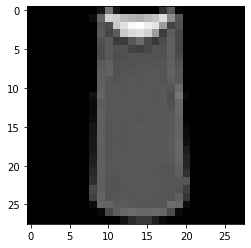

Example Label: 0


In [14]:
# Load pre-shuffled MNIST data into train and test sets
(_xtrain, _ytrain), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

#We want to include a develop set so let's split the training set
train_index=[]
develop_index=[]
for i in range(len(_xtrain)):
    if random() <0.8:
        train_index.append(i)
    else:
        develop_index.append(i)
X_train=_xtrain[train_index]
Y_train=_ytrain[train_index]

X_develop=_xtrain[develop_index]
Y_develop=_ytrain[develop_index]


np.set_printoptions(linewidth=115)
n_targets=np.max(Y_test)+1
print('A Single Image:\n',X_train[0])
plt.imshow(X_train[0],cmap='gray')
plt.show()
print('Example Label:', Y_train[0])

* Note above that the labels are integers from 0-9
* Also note the images are integers from 0-255 (uint8)

We will deal with the labels first. Lets make some useful arrays and dictionaries to keep track of what each integer means 

In [15]:
# This is useful for making plots it takes an integer
lookup_dict={
    0 :'T-shirt/top',
    1 :'Trouser',
    2 :'Pullover',
    3 :'Dress',
    4 :'Coat',
    5 :'Sandal',
    6 :'Shirt',
    7 :'Sneaker',
    8 :'Bag',
    9 :'Ankle boot' 
}


#Lets make a list in the order of the labels above so [T-Shirt,Trouser,...]
labels=list(lookup_dict.values())

#Check to make sure labels list is in the right order (not guaranteed in python < 3.6)
if not all([v==lookup_dict[i] for i,v in enumerate(labels) ]):
    print('This looks like an old version of python making labels the long way, you are using python version', version)
    labels=['' for i in range(n_targets) ] #make a list with the right size
    for key in lookup_dict:
        labels[key]=lookup_dict[key] #Assign list to the vaules
        
#Always good to make simple checks that what you think is going to work actually is working
#Here we check that our array of labels is in the same order as the dictionary we wrote above
assert(all([v==lookup_dict[i] for i,v in enumerate(labels) ]))
print("Array and dictionary are in same order")    

#Another Simple Check (Keras is well tested this will work, but it's good to get in the habit when using your own data)
assert(len(X_train)==len(Y_train))
print("X_train and Y_train are the same length") 
assert(len(X_develop)==len(Y_develop))
print("X_develop and Y_develop are the same length")   
assert(len(X_test)==len(Y_test))
print("X_test and Y_test are the same length")  

Array and dictionary are in same order
X_train and Y_train are the same length
X_develop and Y_develop are the same length
X_test and Y_test are the same length


# Multi-Class Classification

**Reminder**
   * Classification is problem where each of our examples (x) belongs to a class (y). Since Neural networks are universal function approximators, we can use $P(y|x)$

**Like before to change our problem we need**
* The correct activation on our last layer - **softmax**
* The correct loss function - **categorical_crossentropy**

We have more than two classes (0,1,2...) and we need to predict the probability of all of them. However, we have a constraint that all the probabilities must sum to one.

**Our network**
 * Inputs are our images
 * Output is a Dense layer with dimension equal to the number of classes
     * Each output represents $\{P(y=0|x),(y=1|x),(y=2|x)\ ...\}$.
 * We require $\sum_i P(y=i|x) = 1$.

* To enforce this we use a different activation function: a **softmax**

    * $\sigma(x)_i= \frac{e^{x_i}}{\sum_i e^{x_i}}$
    
* Our loss function becomes

 $L=-\frac{1}{N}\sum_i \sum_n y_{true,i,n}*ln(y_{pred,i,n})$

* What this means
    * $y_{true,i,n}$ is a vector with a 1 in the dimention that example belongs to and a zero everywhere else
        *  i.e. Ankle boot = class 9 = (0,0,0,0,0,0,0,0,0,1)
    * The sum in this loss term  $\sum_n y_{true,i,n}*ln(y_{pred,i,n})$
        * is zero except for the one value when n=class of $y_{true}$
        * Then it's just $ln(y_{pred,i,n})$
        * This is same as binary classfication: make -1*$ln(y_{pred,i,n})$ as small as possible




Our input data set has labels stored as integers, but the labels we need for our loss function need to be  **one-hot** encoded

**one-hot** - A vector of zeros except for one entry with a 1 that represents the class of an object
   * i.e. Ankle boot = class 9 = (0,0,0,0,0,0,0,0,0,1)

keras has a utility to convert integers like this easily.

In [16]:
Y_train_one_hot = tf.keras.utils.to_categorical(Y_train, 10)
Y_develop_one_hot =  tf.keras.utils.to_categorical(Y_develop, 10)
Y_test_one_hot =  tf.keras.utils.to_categorical(Y_test, 10)

print('Example:',Y_train[0],'=',Y_train_one_hot[0])

Example: 0 = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Now lets handle the image data
* Our Convolutional Neural Networks need a shape of Batch x Height x Width x Channels, for us (batch_size x 28 x 28 x 1)
* In this case channels=1, but for a color image you'll have 3 RGB and sometimes 4 with a transparency channel RGBA 
* It's much easier for a neural network to handle data with range from 0-1, rather than 0-255, so we will scale the data

Datatype: uint8 
Max value: 255


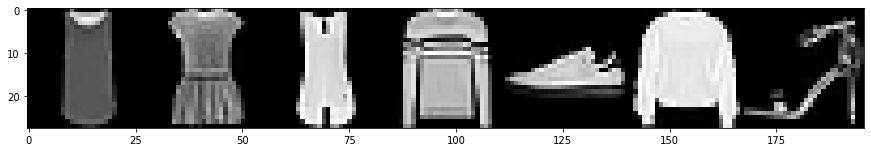

In [17]:

f=plt.figure(figsize=(15,3))
plt.imshow(np.squeeze(np.hstack(X_train[0:7])),cmap='gray') #hstack aranges the first 7 images into one long image

#Reshape
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_develop = X_develop.reshape(X_develop.shape[0], 28, 28, 1)


print("Datatype:",X_train.dtype, "\nMax value:", X_train.max())

Notice that the pixel values imported as an integer array that saturates at `255`.  Let's turn the data into floats $\in [0, 1]$.

In [18]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

if X_train.max()>1:  
    X_train = X_train/255
    X_test = X_test/255
    X_develop = X_develop/255

assert(np.max(X_train) <=1)
assert(np.max(X_test) <=1)
assert(np.max(X_develop) <=1)
print("all sets scaled to float values between", X_train.min(), "and", X_train.max())


all sets scaled to float values between 0.0 and 1.0


# The Take Away

* Image data is 3 dimensional (width,height,channel (i.e color) )
    * It is often stored from 0-255 and should be normalized between 0-1
* Class labels are given as integers and need to be converted to **one hot** vectors
    
* Multi-classification problems 
    * Use **softmax** as an output
    * Use **Categorical Cross Entropy** as a loss function


# Dense Network for Image Classification

* We can use everything we learned in Lesson 2 for Image classification
* But we need one extra layer
    * Dense Layers take 1-D data not 3-D data
    * Convert the two by Flattening
    * tf.keras.layers.Flatten()
    
All this does is reshape the input data

$\begin{pmatrix}a & b \\c & d\end{pmatrix} \rightarrow (a,b,c,d)$

Let's try the network below 


In [19]:
input_layer=tf.keras.layers.Input( shape=X_train.shape[1:] ) # Shape here does not include the batch size 

## Here is our magic layer to turn image data into something a dense layer can use
flat_input=tf.keras.layers.Flatten()(input_layer )#Dense layers take a shape of ( batch x features)
##
hidden_layer1=tf.keras.layers.Dense(100)(flat_input)    
hidden_layer_activation=tf.keras.layers.LeakyReLU()(hidden_layer1)
hidden_layer2=tf.keras.layers.Dense(100)(hidden_layer1)
hidden_layer_activation=tf.keras.layers.LeakyReLU()(hidden_layer2)
output_layer=tf.keras.layers.Dense(n_targets,activation='softmax')(hidden_layer2)
dense_model=tf.keras.models.Model(input_layer,output_layer)

dense_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

dense_model.summary()

history=dense_model.fit(X_train, Y_train_one_hot, 
          batch_size=32, epochs=10, verbose=1,
         validation_data=(X_develop,Y_develop_one_hot)
         )


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Train on 48112 samples, validate on 11888 samples
Epoch 1/10
48112/48112 [==============================] - 4s 83us/step - loss: 0.5731 - 

## Loss Curves

The keras fit function returns a history object, that we've ignored until now, but it's a very important tool.
It records the loss of the training and development datasets at each epoch, as well as metrics like accuracy.
Let's plot the loss.

**Most imporantly**
* Is the development loss greater than the train loss?
    * If so your model is overfit and will give worse performance



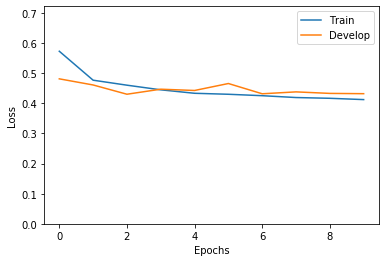

In [20]:
#We'll do this a lot so let's put it in a function
def plot_history(history):     
    plt.plot(history.history['loss'],label='Train')
    plt.plot(history.history['val_loss'],label='Develop')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim((0,1.5*np.max(history.history['val_loss'])))
    plt.legend()
    plt.show()
plot_history(history)

There are many techniques to deal with over-fitting and we'll talk more about them latter, but the easiest way is to just stop the training earlier. You can do this with


```keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)```

This is a callback, or a function that can be used to control the fitting process. It's called at the end of every epoch, or even the end of every batch. We can use these functions by adding them to the fit functions with


```model.fit(...,
  callbacks=[func1,func2])```
  


Train on 48112 samples, validate on 11888 samples
Epoch 1/10
48112/48112 [==============================] - 3s 72us/step - loss: 0.4094 - acc: 0.8561 - val_loss: 0.4366 - val_acc: 0.8489
Epoch 2/10
48112/48112 [==============================] - 3s 71us/step - loss: 0.4089 - acc: 0.8572 - val_loss: 0.4084 - val_acc: 0.8604
Epoch 3/10
48112/48112 [==============================] - 3s 72us/step - loss: 0.4048 - acc: 0.8582 - val_loss: 0.4320 - val_acc: 0.8496


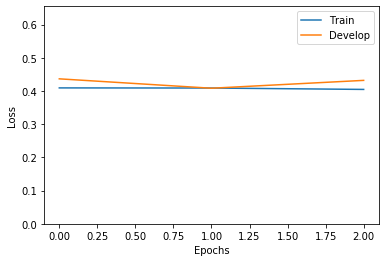

In [21]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')
history=dense_model.fit(X_train, Y_train_one_hot, 
          batch_size=32, epochs=10, verbose=1,
         validation_data=(X_develop,Y_develop_one_hot),
          callbacks=[es] 
                       )

plot_history(history)

Since we picked up training where we left off the early stopping function quits training as soon as the develop loss stops going down.

# Excerise 1

With that let's practice writing our own Dense network image classifier
We will a new dataset as an example cifar10


labels=https://www.cs.toronto.edu/~kriz/cifar.html


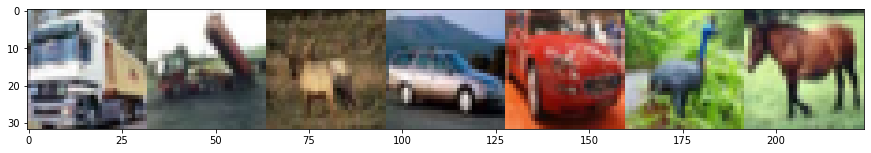

In [22]:
# Load CIFAR data into train and test sets
(_cfxtrain, _cfytrain), (cfX_test, cfY_test) = tf.keras.datasets.cifar10.load_data()

#Split into Train and Develop

train_index=[]
develop_index=[]
for i in range(len(_cfxtrain)):
    if random() <0.8:
        train_index.append(i)
    else:
        develop_index.append(i)
cfX_train=_cfxtrain[train_index]
cfY_train=_cfytrain[train_index]

cfX_develop=_cfxtrain[develop_index]
cfY_develop=_cfytrain[develop_index]

f=plt.figure(figsize=(15,3))
plt.imshow(np.hstack(cfX_train[0:7])) #hstack aranges the first 7 images into one long image



# Step 1 Scale your data to be between 0 and 1

In [23]:
"Your code here normalize cfX_train/test/develop"

'Your code here normalize cfX_train/test/develop'

In [24]:
for data_set in [cfX_train,cfX_develop,cfX_test]:
    assert np.max(data_set)==1., 'Max of your data set is '+str(np.max(data_set))+' not 1'
    assert np.min(data_set)==0., 'Max of your data set is '+str(np.min(data_set))+' not 0'

print('Great job! Your dataset is normalized correctly')

AssertionError: Max of your data set is 255 not 1

# Step 2 Create One-Hot encoded labels
Name them:
* cfY_train_one_hot
* cfY_develop_one_hot
* cfY_test_one_hot


In [ ]:
"Your code here"

In [ ]:
assert 'cfY_train_one_hot' in locals(),  'cfY_train_one_hot not found' 
assert 'cfY_develop_one_hot' in locals(),  'cfY_develop_one_hot not found' 
assert 'cfY_test_one_hot' in locals(),  'cfY_test_one_hot not found' 

assert (cfY_train_one_hot).shape[1]==10,  'cfY_train_one_hot not the correct size' 
assert (cfY_develop_one_hot).shape[1]==10,  'cfY_develop_one_hot not the correct size' 
assert (cfY_test_one_hot).shape[1]==10,  'cfY_test_one_hot not the correct size'
print("One-Hot encoded labels created, correct size")

# Step 3 Create a Dense Neural Network
Write your own dense image classifier.

Remeber you'll need: 
* an input layer
* a flatten layer
* some dense layers with activations
* an output layer with a softmax activation

Create and compile a model named **cifar_model**
* Make sure the loss is catagorical_crossentropy


In [ ]:
"your code here"

In [ ]:
assert 'cifar_model' in locals(), "Could not find cifar_model"
assert cifar_model.input_shape ==(None,32,32,3), "Check your input shape is correct"
assert cifar_model.output_shape[1] ==10, "Check your output shape is correct"
assert cifar_model._is_compiled, "Make sure to compile your model"
assert cifar_model.loss=='categorical_crossentropy', "Check your loss to make sure it's correct"
assert (np.abs(np.sum(cifar_model.predict(cfX_train[0:10]),axis=1)-1) < 1e-5).all(), "Outputs don't sum to 1 make sure you have the correct activation"

print('Fantastic Job! It looks like your model is ready to fit.')

## Step 4: Fit your Model

In [ ]:

history=cifar_model.fit(cfX_train, cfY_train_one_hot, 
          batch_size=32, epochs=10, verbose=1,
         validation_data=(cfX_develop,cfY_develop_one_hot)
         )


## Step 5: Plot your loss curves

In [ ]:
"your code here"